## TUTORIAL DE OPENCV

In [ ]:
# pip install opencv-python

#### LIBRERÍAS

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### CARGA DE IMÁGENES

In [44]:
img = cv.imread('./Resources/Photos/cats.jpg')

cv.imshow('Cats', img) # Muestra la imagen.

cv.waitKey(0) # Necesitamos poner esta línea para indicarle que se cierre la ventana emergente manualmente sin que dé error en el notebook.

# Cuando usamos un script de python en lugar de un notebook, funciona del siguiente modo:
# - El valor 0 indicará que la ventana no se cierra hasta que no lo hagamos manualmente o presionemos una tecla
# - Un valor mayor que 0, indicará los milisegundos que permanecerá abierta la ventana.


-1

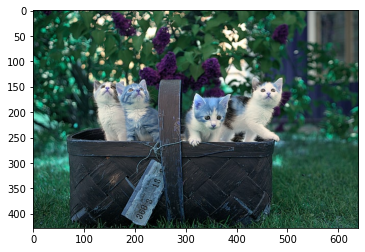

In [3]:
plt.imshow(img)

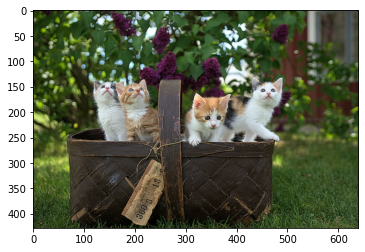

In [4]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

#### CARGA DE VÍDEOS

In [5]:
capture = cv.VideoCapture('./Resources/Videos/dog.mp4') # creamos el capturador de frames

while True:
    isTrue, frame = capture.read() 
    
    if isTrue:
        cv.imshow('Video', frame)
        if cv.waitKey(20) & 0xFF==ord('c'): # permite salir del bucle pulsando la tecla 'c'
            break            
    else:
        break

capture.release()
cv.destroyAllWindows()

In [ ]:
# Guardar la imagen o vídeo

cv.imwrite("output.jpg",img)

#### FUNCIONES BÁSICAS

Sacar contornos. Es una de las funciones más útiles a la hora de crear modelos de Machine Learning para la detección y/o identificación de objetos.

In [6]:
canny = cv.Canny(img, 125, 175)
cv.imshow('Canny Edges', canny)

cv.waitKey(0)

-1

In [7]:
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

2794 contour(s) found!


Tenemos demasiados contornos para que un modelo de Machine Learning pueda ser bien entrenado. Para solucionar esto, podemos reducir la información que contiene del siguiente modo:

Convertir a escala de grises

In [8]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

cv.waitKey(0)

-1

In [9]:
canny = cv.Canny(gray, 125, 175)
cv.imshow('Canny Edges', canny)

cv.waitKey(0)

-1

In [10]:
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

2479 contour(s) found!


Hacer la imagen más borrosa

In [11]:
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
cv.imshow('Blur', blur)

cv.waitKey(0)

-1

In [18]:
canny = cv.Canny(blur, 125, 175)
cv.imshow('Canny Edges', canny)

cv.waitKey(0)

-1

In [13]:
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

287 contour(s) found!


Expandir la imagen

In [16]:
dilated = cv.dilate(canny, (7,7), iterations=3)
cv.imshow('Dilated', dilated)

cv.waitKey(0)

-1

Reducir la imagen

In [17]:
eroded = cv.erode(dilated, (7,7), iterations=3)
cv.imshow('Eroded', eroded)

cv.waitKey(0)

-1

Redimensionar

In [19]:
resized = cv.resize(img, (500,500), interpolation=cv.INTER_CUBIC)
cv.imshow('Resized', resized)

cv.waitKey(0)

-1

Imagen espejo

In [20]:
flip = cv.flip(img, -1)
cv.imshow('Flip', flip)

cv.waitKey(0)

-1

Rotar imagen

In [21]:
def rotate(img, angle, rotPoint=None):
    (height,width) = img.shape[:2]

    if rotPoint is None:
        rotPoint = (width//2,height//2)
    
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width,height)

    return cv.warpAffine(img, rotMat, dimensions)

In [22]:
rotated = rotate(img, -45)
cv.imshow('Rotated', rotated)

cv.waitKey(0)

-1

Trasladar

In [23]:
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

# -x --> Left
# -y --> Up
# x --> Right
# y --> Down

In [24]:
translated = translate(img, -100, 100)
cv.imshow('Translated', translated)

cv.waitKey(0)

-1

Mostrar una región determinada

In [25]:
cropped = img[50:200, 200:400]
cv.imshow('Cropped', cropped)

cv.waitKey(0)

-1

#### DIBUJAR EN UNA IMAGEN

Crear imagen "vacía" con dimensiones determinadas

In [26]:
blank = np.zeros(img.shape, dtype='uint8')
cv.imshow('Blank', blank)

cv.waitKey(0)

-1

In [ ]:
blank = np.zeros((500,500,3), dtype='uint8')
cv.imshow('Blank', blank)

cv.waitKey(0)

Esto es muy útil para eliminar información innecesaria. Así, por ejemplo, podemos detectar los contornos de los gatos y dibujarlos en nuestra imagen vacía. De este modo, aligeramos mucho la imagen.

In [27]:
cv.drawContours(blank, contours, -1, (0,0,255), 1)

cv.imshow('Contours Drawn', blank)

cv.waitKey(0)

-1

Otros tipos de dibujos

In [28]:
# 1. Pintar la imagen de cierto color
blank[200:300, 300:400] = 0,0,255
cv.imshow('Red', blank)

# 2. Dibujar un rectángulo
cv.rectangle(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,255,0), thickness=-1)
cv.imshow('Rectangle', blank)

# 3. Dibujar un círculo
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255), thickness=-1)
cv.imshow('Circle', blank)

# 4. Dibujar una línea
cv.line(blank, (100,250), (300,400), (255,255,255), thickness=3)
cv.imshow('Line', blank)

# 5. Escribir texto
cv.putText(blank, 'Hola mundo', (0,225), cv.FONT_HERSHEY_TRIPLEX, 1.0, (255,0,0), 2)
cv.imshow('Text', blank)

cv.waitKey(0)

-1

#### OTRAS FUNCIONES

Imagen bicolor

Desde una imagen en escala de grises, podemos sacar una imagen bicolor. Establecemos un valor de referencia o thresh, y todos los valores por encima de éste serán el valor máximo (también establecido) y los que estén por debajo serán 0. Con esto también eliminamos mucha información innecesaria.

In [29]:
# Thresholding simple
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY )
cv.imshow('Simple Thresholded', thresh)

cv.waitKey(0)

-1

In [30]:
threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV )
cv.imshow('Simple Thresholded Inverse', thresh_inv)

cv.waitKey(0)

-1

In [31]:
# Thresholding adaptativo
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 9)
cv.imshow('Adaptive Thresholding', adaptive_thresh)

cv.waitKey(0)

-1

Espacios de color

In [32]:
img = cv.imread('./Resources/Photos/park.jpg')
cv.imshow('Park', img)

# Color a escala de grises
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# BGR a HSV. Modelo de color HSV (Hue, Saturation, Value – Tonalidad, Saturación, Brillo)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('HSV', hsv)

# BGR a LAB (L*a*b) (L*=luminosidad, a*= coordenadas rojo/verde (+a indica rojo, -a indica verde), b* = coordenadas amarillo/azul (+b indica amarillo, -b indica azul))
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('LAB', lab)

# BGR a RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RGB', rgb)

# LAB a BGR
lab_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
cv.imshow('LAB --> BGR', lab_bgr)

cv.waitKey(0)

-1

Gradientes

![image alt text](https://docs.opencv.org/4.x/gradients.jpg)

In [33]:
img = cv.imread('./Resources/Photos/park.jpg')
cv.imshow('Park', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# Sobel 
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('Laplacian', lap)

cv.imshow('Sobel X', sobelx)
cv.imshow('Sobel Y', sobely)
cv.imshow('Combined Sobel', combined_sobel)

cv.waitKey(0)

-1

Máscaras

https://omes-va.com/operadores-bitwise/

bitwise_and: devuelve 1 o verdadero cuando todas sus entradas eran 1 o verdaderas. Es decir, coge las regiones comunes con la primera imagen y la segunda.

![image alt text](https://omes-va.com/wp-content/uploads/2019/10/TABLA-DE-VERDAD-AND.png)

In [34]:
img = cv.imread('./Resources/Photos/cats 2.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('Blank Image', blank)

circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45,img.shape[0]//2), 100, 255, -1)

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)

weird_shape = cv.bitwise_and(circle,rectangle)
cv.imshow('Weird Shape', weird_shape)

masked = cv.bitwise_and(img,img,mask=weird_shape)
cv.imshow('Weird Shaped Masked Image', masked)

cv.waitKey(0)

-1

bitwise_or: al menos uno de los valores de entrada es verdadero o 1, su salida también lo es. Es únicamente falso o 0, cuando todas sus entradas son 0 o falso. Es decir,coge las regiones que están definidas por la primera imagen o la segunda.

![image alt text](https://omes-va.com/wp-content/uploads/2019/10/TABLA-DE-VERDAD-OR.png)

In [35]:
img = cv.imread('./Resources/Photos/cats 2.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('Blank Image', blank)

circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45,img.shape[0]//2), 100, 255, -1)

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)

weird_shape = cv.bitwise_or(circle,rectangle)
cv.imshow('Weird Shape', weird_shape)

masked = cv.bitwise_and(img,img,mask=weird_shape)
cv.imshow('Weird Shaped Masked Image', masked)

cv.waitKey(0)

-1

bitwise_xor: sus salidas toman el valor de falso o 0 cuando ambas entradas poseen el mismo valor, mientras que es verdadero o 1 en los demás casos. Es decir, coge las regiones que no sean comunes a las dos imágenes.

![image alt text](https://omes-va.com/wp-content/uploads/2019/10/TABLA-DE-VERDAD-XOR.png)

In [36]:
img = cv.imread('./Resources/Photos/cats 2.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('Blank Image', blank)

circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45,img.shape[0]//2), 100, 255, -1)

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)

weird_shape = cv.bitwise_xor(circle,rectangle)
cv.imshow('Weird Shape', weird_shape)

masked = cv.bitwise_and(img,img,mask=weird_shape)
cv.imshow('Weird Shaped Masked Image', masked)

cv.waitKey(0)

-1

bitwise_not: cuando una entrada es verdadera o 1, su salida es falso o  0, y viceversa. Es decir, devuelve los valores contrarios de la imagen dada (ya que admite darle solo una imagen) o lo no común entre la primera imagen y la segunda, incluidos los colores, por lo que devolverá los colores negativos.

![image alt text](https://omes-va.com/wp-content/uploads/2019/10/TABLA-DE-VERDAD-NOT.png)

In [45]:
img = cv.imread('./Resources/Photos/cats 2.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('Blank Image', blank)

circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45,img.shape[0]//2), 100, 255, -1)

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)

weird_shape = cv.bitwise_not(circle,rectangle)
cv.imshow('Weird Shape', weird_shape)

masked = cv.bitwise_not(img,img,mask=weird_shape)
cv.imshow('Weird Shaped Masked Image', masked)

cv.waitKey(0)

-1

Histogramas

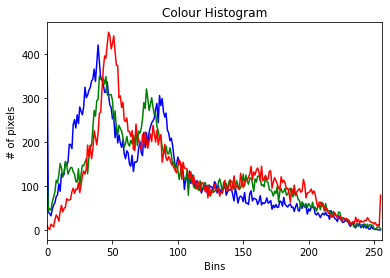

-1

In [38]:
img = cv.imread('./Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gray)

mask = cv.circle(blank, (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)

masked = cv.bitwise_and(img,img,mask=mask)
cv.imshow('Mask', masked)

# GRayscale histogram
# gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256] )

# plt.figure()
# plt.title('Grayscale Histogram')
# plt.xlabel('Bins')
# plt.ylabel('# of pixels')
# plt.plot(gray_hist)
# plt.xlim([0,256])
# plt.show()

# Colour Histogram

plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], mask, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.show()

cv.waitKey(0)

División en los canales de color

In [39]:
img = cv.imread('./Resources/Photos/park.jpg')
cv.imshow('Park', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

b,g,r = cv.split(img)

blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])


cv.imshow('Blue', blue)
cv.imshow('Green', green)
cv.imshow('Red', red)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

merged = cv.merge([b,g,r])
cv.imshow('Merged Image', merged)

cv.waitKey(0)

(427, 640, 3)
(427, 640)
(427, 640)
(427, 640)


-1

### DETECCIÓN DE ROSTROS

OpenCV tiene algunos modelos de predicción de Machine Learning preentrenados incorporados. De este modo, podremos, por ejemplo, detectar rostros en una imagen.

https://github.com/opencv/opencv/tree/4.x/data/haarcascades

En este enlace podemos ver todos los modelos preentrenados de los que disponemos. Para usarlos, tendremos que copiar todo el código *.xml de aquel modelo que queramos usar, crear un archivo con extensión *.xml y copiarlo dentro. De este modo, ya podremos cargar el modelo desde ahí.

In [43]:
# Utilizaremos un modelo en cascada "CascadeClassifier", que nos permitirá identificar distintos elementos

img = cv.imread('./Resources/Photos/lady.jpg')
cv.imshow('Lady', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # El modelo en cascada no atiende al tono de la piel, solo a los contornos, por lo que no nos
# hace falta el color, que hace que una imagen sea mucho más pesada.
cv.imshow('Gray lady', gray)

haar_cascade = cv.CascadeClassifier('./Section #3 - Faces/haar_face.xml') # este modelo haar identifica caras que están de frente

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5) # Nos devolverá una lista con las coordenadas 
# rectangulares de cada una de las caras que ha identificado.

print(f'Number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2) # dibuja el rectángulo en las coordenadas especificadas

cv.imshow('Detected Faces', img)



cv.waitKey(0)

Number of faces found = 1


-1

In [42]:
img = cv.imread('./Resources/Photos/group 1.jpg')
cv.imshow('Group of 5 people', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray People', gray)

haar_cascade = cv.CascadeClassifier('./Section #3 - Faces/haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

print(f'Number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv.imshow('Detected Faces', img)



cv.waitKey(0)

Number of faces found = 19


-1

Referencias:

https://www.youtube.com/watch?v=oXlwWbU8l2o&ab_channel=freeCodeCamp.org

https://github.com/opencv/opencv

https://omes-va.com/operadores-bitwise/

https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html